<a href="https://colab.research.google.com/github/TayJen/hackathon_algu2022/blob/master/H_ALGU_2022_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Подготовка данных

In [ ]:
%cd /content/drive/Shareddrives/data_drive/H_Vladivostok2022
!pwd

/content/drive/Shareddrives/data_drive/H_Vladivostok2022
/content/drive/Shareddrives/data_drive/H_Vladivostok2022


In [ ]:
# !mkdir ./data/train
# !mkdir ./data/test
# !unzip ./data/zipped/train_dataset_train.zip -d ./data/train/
# !unzip ./data/zipped/test_dataset_test.zip -d ./data/test

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Работа с данными

## Общий взгляд

In [ ]:
df = pd.read_csv("./data/train/train_issues.csv")
df.shape

(9589, 8)

In [ ]:
df.head()

,id,created,key,summary,project_id,assignee_id,creator_id,overall_worklogs
0,819952,2019-10-01 05:57:18.000,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800
1,819949,2019-10-01 05:59:45.000,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200
2,819947,2019-10-01 06:00:38.000,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400
3,819943,2019-10-01 06:02:49.000,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900
4,819941,2019-10-01 06:03:26.000,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900


In [ ]:
df.describe()

,id,project_id,assignee_id,creator_id,overall_worklogs
count,9.589000e+03,9589.000000,9589.000000,9589.000000,9.589000e+03
mean,7.265522e+05,17.493482,114.838461,117.467411,1.724369e+04
std,3.114348e+04,10.389579,125.497901,117.299165,9.864197e+04
min,6.696640e+05,5.000000,1.000000,1.000000,6.000000e+01
25%,7.225060e+05,13.000000,10.000000,11.000000,3.000000e+03
50%,7.256220e+05,13.000000,82.000000,82.000000,7.200000e+03
75%,7.287280e+05,13.000000,197.000000,193.000000,1.470000e+04
max,1.056012e+06,56.000000,384.000000,384.000000,7.014000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9589 non-null   int64 
 1   created           9589 non-null   object
 2   key               9589 non-null   object
 3   summary           9589 non-null   object
 4   project_id        9589 non-null   int64 
 5   assignee_id       9589 non-null   int64 
 6   creator_id        9589 non-null   int64 
 7   overall_worklogs  9589 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 599.4+ KB


Проверка на наличие дубликатов

In [ ]:
df.duplicated().sum()

0

## Фича created - поработаем с временем

In [ ]:
df['created'].tail()

9584    2020-06-15 09:47:30.000
9585    2020-06-02 10:08:14.000
9586    2020-06-05 09:52:12.000
9587    2020-06-05 13:46:38.000
9588    2020-06-09 02:56:25.000
Name: created, dtype: object

In [ ]:
df['created'][0]

'2019-10-01 05:57:18.000'

In [ ]:
df['created_time'] = pd.to_datetime(df['created'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                9589 non-null   int64         
 1   created           9589 non-null   object        
 2   key               9589 non-null   object        
 3   summary           9589 non-null   object        
 4   project_id        9589 non-null   int64         
 5   assignee_id       9589 non-null   int64         
 6   creator_id        9589 non-null   int64         
 7   overall_worklogs  9589 non-null   int64         
 8   created_time      9589 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 674.4+ KB


In [ ]:
df.head()

,id,created,key,summary,project_id,assignee_id,creator_id,overall_worklogs,created_time
0,819952,2019-10-01 05:57:18.000,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019-10-01 05:57:18
1,819949,2019-10-01 05:59:45.000,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019-10-01 05:59:45
2,819947,2019-10-01 06:00:38.000,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019-10-01 06:00:38
3,819943,2019-10-01 06:02:49.000,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019-10-01 06:02:49
4,819941,2019-10-01 06:03:26.000,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019-10-01 06:03:26


In [ ]:
df.drop('created', axis=1, inplace=True)
df.head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,created_time
0,819952,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019-10-01 05:57:18
1,819949,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019-10-01 05:59:45
2,819947,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019-10-01 06:00:38
3,819943,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019-10-01 06:02:49
4,819941,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019-10-01 06:03:26


In [ ]:
df['year'] = df['created_time'].dt.year
df['month'] = df['created_time'].dt.month
df['day'] = df['created_time'].dt.day
df['hour'] = df['created_time'].dt.hour
df['minute'] = df['created_time'].dt.minute
df.head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,created_time,year,month,day,hour,minute
0,819952,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019-10-01 05:57:18,2019,10,1,5,57
1,819949,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019-10-01 05:59:45,2019,10,1,5,59
2,819947,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019-10-01 06:00:38,2019,10,1,6,0
3,819943,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019-10-01 06:02:49,2019,10,1,6,2
4,819941,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019-10-01 06:03:26,2019,10,1,6,3


In [ ]:
df.drop('created_time', axis=1, inplace=True)
df.head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
0,819952,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57
1,819949,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59
2,819947,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0
3,819943,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2
4,819941,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3


## Фичи creator_id и assignee_id

In [ ]:
df[df.assignee_id != df.creator_id].head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
7,819933,SM-10686,Сделать разделение по мобильным операторам,5,207,1,7800,2019,10,1,6,6
10,819924,SM-10690,Не отрабатывает cdr_calc_durations,5,264,207,17580,2019,10,1,8,36
13,819917,SM-10693,Собрать водительскую прилу с измененным id вер...,5,8,54,5400,2019,10,2,2,49
14,819912,SM-10694,Фидбек от Чака,5,207,8,4200,2019,10,2,12,41
17,819903,SM-10698,Переделать отчет под новый формат (taxi-corp-s...,5,264,1,55260,2019,10,3,9,41


## Фича project_id

In [ ]:
df.project_id.unique()

array([ 5, 13, 15, 29, 33, 48, 56])

In [ ]:
df_test = pd.read_csv('./data/test/test_issues.csv')
df_test.project_id.unique()

array([ 5, 13, 15, 29, 33, 48, 56])

In [ ]:
df.groupby('project_id')['id'].count().reset_index()

,project_id,id
0,5,299
1,13,6951
2,15,498
3,29,642
4,33,519
5,48,676
6,56,4


In [ ]:
df_test.groupby('project_id')['id'].count().reset_index()

,project_id,id
0,5,34
1,13,773
2,15,56
3,29,72
4,33,58
5,48,76
6,56,1


In [ ]:
df[df.project_id == 56]

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
9585,670934,LJ-1,Set up the neo4j by using a dataset from Slack,56,2,2,16200,2020,6,2,10,8
9586,670932,LJ-3,Set up a graph in neo4j by GitLab dataset,56,2,2,3600,2020,6,5,9,52
9587,670931,LJ-4,Parse a dataset from teacherly slack,56,2,2,6300,2020,6,5,13,46
9588,670930,LJ-5,Expand a gitlab parser by adding members emails,56,2,2,5400,2020,6,9,2,56


In [ ]:
df_test[df_test.project_id == 56]

,id,created,key,summary,project_id,assignee_id,creator_id
1069,670929,2020-06-12 03:18:53.000,LJ-6,Build one graph according to existing datasets,56,2,2


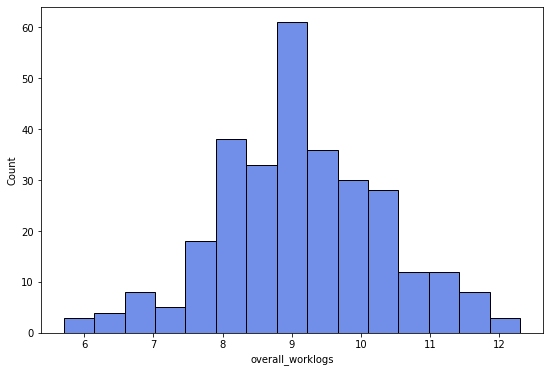

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=np.log(df[df.project_id == 5]['overall_worklogs']),
             color='royalblue', bins=15)
plt.show()

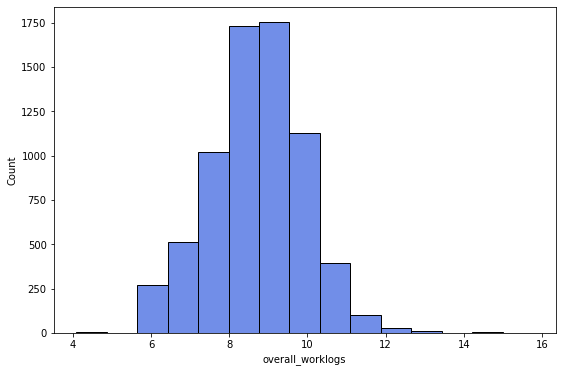

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=np.log(df[df.project_id == 13]['overall_worklogs']),
             color='royalblue', bins=15)
plt.show()

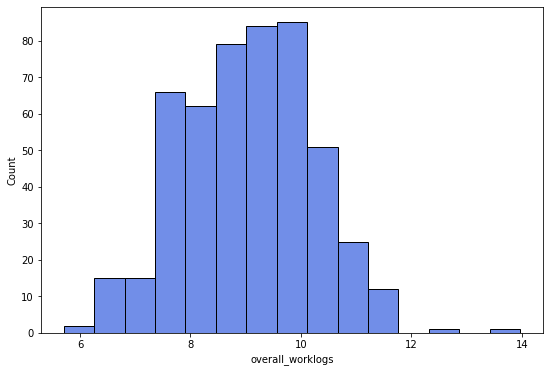

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=np.log(df[df.project_id == 15]['overall_worklogs']),
             color='royalblue', bins=15)
plt.show()

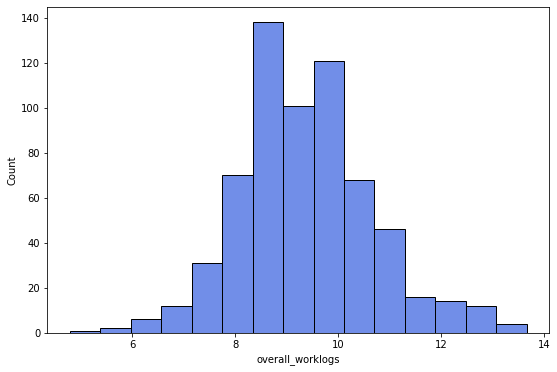

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=np.log(df[df.project_id == 29]['overall_worklogs']),
             color='royalblue', bins=15)
plt.show()

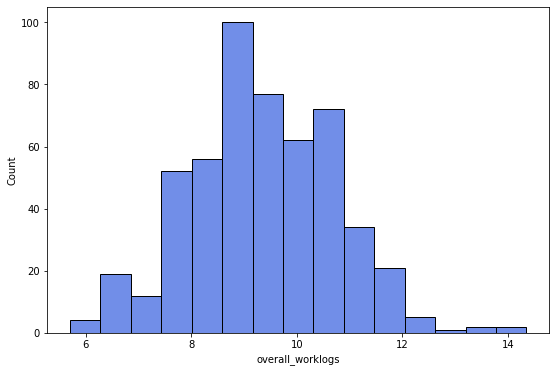

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=np.log(df[df.project_id == 33]['overall_worklogs']),
             color='royalblue', bins=15)
plt.show()

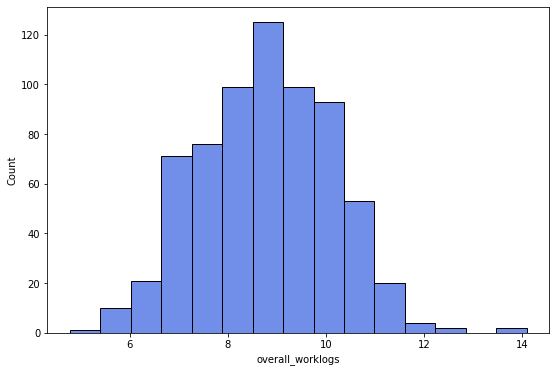

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=np.log(df[df.project_id == 48]['overall_worklogs']),
             color='royalblue', bins=15)
plt.show()

Значения распределены нормально в логарифмированном таргете по всем проектам, инсайта в фиче не обнаружено

## Фича key

In [ ]:
len(df.key.unique())

9576

In [ ]:
df.key.unique()

array(['SM-10678', 'SM-10679', 'SM-10680', ..., 'LJ-3', 'LJ-4', 'LJ-5'],
      dtype=object)

In [ ]:
df[df['key'].isin(df['key'][df['key'].duplicated()])].sort_values('key')

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
9520,679334,ADBK-109,Jo.Nawaphon.01 - Cannot access the course deta...,48,1,1,4980,2020,6,5,11,9
8958,689786,ADBK-109,"Readme using the approved format (for EVN, ETL)",48,1,1,14400,2020,3,13,17,52
9521,679333,ADBK-110,Broken course header,48,1,1,4200,2020,6,5,11,15
8959,689784,ADBK-110,How the project is deployed (on staging & prod),48,1,1,14400,2020,3,13,18,7
9537,679332,ADBK-112,Error with SSO Thailand in login,48,1,1,1500,2020,6,8,19,45
8961,689781,ADBK-112,Create a separate sitemap-landings.XML file an...,48,1,374,7200,2020,3,13,22,7
9547,679326,ADBK-114,Tracking button in payment page,48,1,1,24300,2020,6,9,17,29
8966,689777,ADBK-114,"Find one expert in CSS, JS support team",48,1,1,3600,2020,3,16,14,11
9039,689741,ADBK-137,Initiative#3 - Provide flow of contact when ap...,48,1,1,1800,2020,3,24,15,21
9523,679210,ADBK-137,Add margins between sections and add text alig...,48,1,1,7620,2020,6,5,23,9


In [ ]:
df['key_name'] = df['key'].apply(lambda x: x.split('-')[0])
df['key_num'] = df['key'].apply(lambda x: x.split('-')[1])

In [ ]:
df[df['key_name'] == 'BALT']

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,key_num
299,730948,BALT-2,Dashboard redesign - when you login to Teacher...,13,1,1,58200,2018,3,14,11,52,BALT,2
300,730947,BALT-3,Creating a lesson template - basic planning in...,13,1,1,54300,2018,3,14,12,20,BALT,3
302,730942,BALT-8,Markup for Teacher Dashboard page,13,197,197,85200,2018,4,24,13,34,BALT,8
303,730941,BALT-9,Recommended Lessons section,13,197,197,16200,2018,5,1,11,5,BALT,9
304,730940,BALT-10,Your Lessons Section,13,197,197,32400,2018,5,1,11,6,BALT,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,721923,BALT-9031,Set up custom dimensions for Google Analytics ...,13,208,374,22800,2020,11,12,9,7,BALT,9031
7246,721922,BALT-9032,Set customer address on checkout form submited,13,11,11,15300,2020,11,12,12,16,BALT,9032
7247,721921,BALT-9033,OA (swagger) documentation,13,330,330,23400,2020,11,12,16,4,BALT,9033
7248,721919,BALT-9035,Update - Lesson template card with Thumbnail c...,13,149,149,35100,2020,11,13,6,21,BALT,9035


In [ ]:
df_test = pd.read_csv('./data/test/test_issues.csv')
df_test['key_name'] = df_test['key'].apply(lambda x: x.split('-')[0])
df_test['key_num'] = df_test['key'].apply(lambda x: x.split('-')[1])
df_test[df_test.key_name == 'BALT']

,id,created,key,summary,project_id,assignee_id,creator_id,key_name,key_num
34,721916,2020-11-13 13:07:22.590,BALT-9038,UI components: Recent templates do not inherit...,13,208,208,BALT,9038
35,721915,2020-11-13 13:12:03.932,BALT-9039,UI components: Published date doesn't display ...,13,365,208,BALT,9039
36,721914,2020-11-13 13:19:37.873,BALT-9040,Add unit tests,13,330,330,BALT,9040
37,721913,2020-11-13 13:34:05.484,BALT-9041,Copied onboarding template doesn't copied as l...,13,208,193,BALT,9041
38,721912,2020-11-13 14:56:15.450,BALT-9042,Configure alert and grafana dashboards,13,82,82,BALT,9042
...,...,...,...,...,...,...,...,...,...
802,997097,2021-02-01 10:16:24.916,BALT-10381,Application brakes when teacher goes to Studen...,13,208,193,BALT,10381
803,997095,2021-02-01 12:05:04.151,BALT-10383,Move counters data from organisation table,13,330,330,BALT,10383
804,997094,2021-02-01 13:04:05.042,BALT-10384,Need to add the ability to hide the clear butt...,13,86,86,BALT,10384
805,1040330,2021-02-11 13:29:10.514,BALT-10491,Create quick template mockup,13,107,107,BALT,10491


In [ ]:
df_test['key_name'].value_counts()

BALT      768
FPY        72
ADBK       72
XXO        58
UN         56
SM         34
BAD         5
ADBKRK      4
LJ          1
Name: key_name, dtype: int64

In [ ]:
df['key_name'].value_counts()

BALT      6946
FPY        642
XXO        519
UN         498
ADBK       431
SM         299
ADBKRK     245
BA           5
LJ           4
Name: key_name, dtype: int64

In [ ]:
df[df['key_name'] == 'XXO']

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,key_num
8390,689243,XXO-1,Setup Jira and Confluence for Sortedhouse,33,58,58,42000,2019,8,5,17,10,XXO,1
8391,689239,XXO-2,Review documentation,33,58,58,49800,2019,8,5,17,13,XXO,2
8392,689237,XXO-3,Onboarding,33,58,58,42000,2019,8,8,12,8,XXO,3
8393,689234,XXO-4,Frontend developer Onboarding,33,1,58,14700,2019,8,8,12,9,XXO,4
8394,689231,XXO-5,Backend developer Onboarding,33,1,58,17700,2019,8,8,12,10,XXO,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,686645,XXO-643,Finish Payment,33,97,1,14700,2020,8,3,11,15,XXO,643
8905,686640,XXO-644,Add oneTime3DsToken filed in response,33,1,97,3600,2020,8,4,6,48,XXO,644
8906,686638,XXO-645,Run custom tasks from CI,33,82,82,54000,2020,8,5,11,37,XXO,645
8907,686633,XXO-646,Prepare documentation,33,82,82,30600,2020,8,5,17,46,XXO,646


In [ ]:
df_test[df_test['key_name'] == 'XXO']

,id,created,key,summary,project_id,assignee_id,creator_id,key_name,key_num
935,686629,2020-08-07 11:19:13.000,XXO-648,Endpoint for uploading files,33,1,97,XXO,648
936,686628,2020-08-10 04:29:45.000,XXO-649,5:47 The customer is receiving a notification ...,33,1,97,XXO,649
937,686623,2020-08-10 04:31:52.000,XXO-650,"1:47 rename “It is in progress” to ""In Progress""",33,1,97,XXO,650
938,686622,2020-08-10 08:26:00.000,XXO-651,Success/Failure notify markup,33,97,97,XXO,651
939,686619,2020-08-11 11:06:14.000,XXO-652,Add ability to edit jobs dates for a future te...,33,1,58,XXO,652
940,686617,2020-08-17 04:36:51.000,XXO-653,Test Cases and Testing of the Application,33,1,1,XXO,653
941,686615,2020-08-18 11:24:49.000,XXO-654,Job flow finalyzing fixes,33,1,1,XXO,654
942,686611,2020-08-18 11:47:19.000,XXO-655,Portfolio uploading Error in safari and firefox,33,97,97,XXO,655
943,686610,2020-08-20 19:37:14.000,XXO-656,Testing,33,1,1,XXO,656
944,686605,2020-08-27 03:26:55.000,XXO-658,Customer Feedback (241-231),33,97,58,XXO,658


Можно заметить, что номер ключа не влияет на таргет

In [ ]:
df.drop(['key', 'key_num'], axis=1, inplace=True)
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM


## Текстовая фича summary

### Преобразование и очистка

Очистим текст от ненужных символов

In [ ]:
import re

def clear_text(text):
    t = re.sub(r'[^a-zA-Zа-яА-ЯёЁ\' ]', ' ', text)
    t = ' '.join(t.split())
    return t

clear_text('Paste Google Dynamic Remarketing Code into the Markeplace (edumall.co.th) hasn\'t Я ему передал номер, да 13-ый')

"Paste Google Dynamic Remarketing Code into the Markeplace edumall co th hasn't Я ему передал номер да 13 ый"

In [ ]:
df['clear_summary'] = df['summary'].apply(clear_text)

Проверим на наличие пустых строк

In [ ]:
df[df['clear_summary'] == '']

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary


In [ ]:
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,UI тесты по заказу Добро КейДжи
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,UI тесты раздела Профиль
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,UI тесты раздела Личный счет
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,UI тесты раздела Новости
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,UI тесты раздела Зоны скидок и доплат


Преобразуем все в нижний регистр

In [ ]:
df['clear_summary'] = df['clear_summary'].str.lower()
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,ui тесты по заказу добро кейджи
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,ui тесты раздела профиль
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,ui тесты раздела личный счет
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,ui тесты раздела новости
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,ui тесты раздела зоны скидок и доплат


### Посмотрим на длины текстов

In [ ]:
df['summary_symbols'] = df['summary'].apply(len)
df['summary_tokens'] = df['summary'].str.split().apply(len)

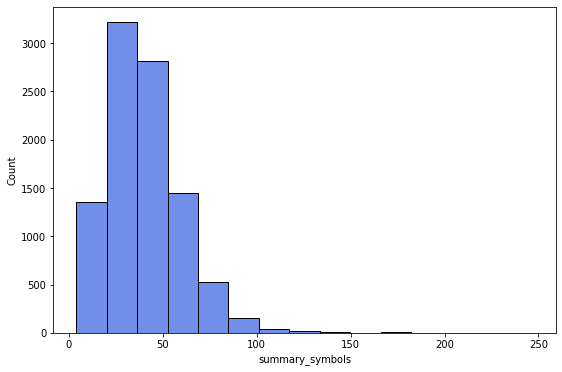

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['summary_symbols'], color='royalblue', bins=15)
plt.show()

Несмотря на длинные описания данные не похожи на выбросы

In [ ]:
df[df['summary_symbols'] > 150]['clear_summary']

113     если оформить заказ и указать пины от и до при...
180     рефакторинг кода вынести реализации функций в ...
299     dashboard redesign when you login to teacherly...
301     so the error is inline images 1seems that the ...
6846    assignments id preview page warning failed pro...
6850    templates library warning failed prop type inv...
7110    teacher's app create new route with the new tr...
8821    in admin panel under services need ability to ...
8825    on provider sign up we had asked for two compa...
Name: clear_summary, dtype: object

In [ ]:
df[df['summary_symbols'] > 150]['clear_summary'][8825]

'on provider sign up we had asked for two company name options for a legal name and a trading display name which hasn t been implemented check comments for this'

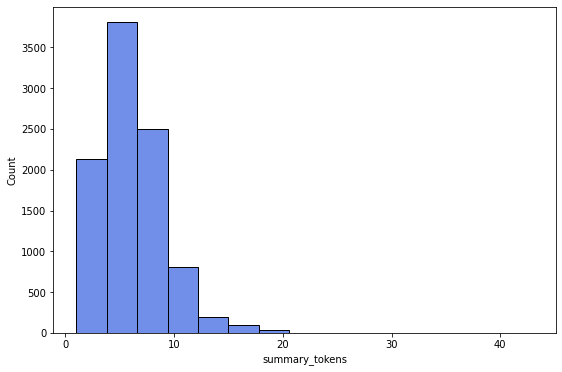

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['summary_tokens'], color='royalblue', bins=15)
plt.show()

In [ ]:
df[df['summary_tokens'] > 25]['clear_summary']

113     если оформить заказ и указать пины от и до при...
299     dashboard redesign when you login to teacherly...
301     so the error is inline images 1seems that the ...
8821    in admin panel under services need ability to ...
8825    on provider sign up we had asked for two compa...
9090    label jira nghi n c u xem jira c cho ph p c u ...
Name: clear_summary, dtype: object

In [ ]:
df[df['summary_tokens'] > 25]['summary'][9090]

'Label Jira: Nghiên cứu xem jira có cho phép cấu hình chỉ cho phép đánh Label sẵn có mà ko cho phép add lebel mới ko'

### Продолжаем преобразование - TF-IDF

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem

Лемматизируем текст, сначала русский язык

In [ ]:
m = Mystem()

def lemmatize_text(text):
    tokens = m.lemmatize(text.lower())
    tokens = [token for token in tokens if token != '\n']
    text = " ".join(tokens)
    
    return text

In [ ]:
# !wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
# !tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

cp: cannot create regular file '/root/.local/bin/mystem': Text file busy


In [ ]:
df['lemm_summary'] = df['clear_summary'].apply(lemmatize_text)
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary,summary_symbols,summary_tokens,lemm_summary
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,ui тесты по заказу добро кейджи,33,6,ui тест по заказ добро кейджи
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,ui тесты раздела профиль,26,4,ui тест раздел профиль
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,ui тесты раздела личный счет,30,5,ui тест раздел личный счет
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,ui тесты раздела новости,26,4,ui тест раздел новость
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,ui тесты раздела зоны скидок и доплат,39,7,ui тест раздел зона скидка и доплата


In [ ]:
df[['clear_summary', 'lemm_summary']].tail()

,clear_summary,lemm_summary
9584,make a test to check teachers pages for vn th,make a test to check teachers page...
9585,set up the neo4j by using a dataset from slack,set up the neo4j by using a data...
9586,set up a graph in neo4j by gitlab dataset,set up a graph in neo4j by gitla...
9587,parse a dataset from teacherly slack,parse a dataset from teacherly slack
9588,expand a gitlab parser by adding members emails,expand a gitlab parser by adding m...


Теперь английский

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import wordnet

In [ ]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [ ]:
def lemmatize_with_pos(text):
    pos_tagged = nltk.pos_tag(w_tokenizer.tokenize(text))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, pos=tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence


lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
df['lemm_summary'] = df['lemm_summary'].apply(lemmatize_with_pos)

In [ ]:
df[['clear_summary', 'lemm_summary']].head()

,clear_summary,lemm_summary
0,ui тесты по заказу добро кейджи,ui тест по заказ добро кейджи
1,ui тесты раздела профиль,ui тест раздел профиль
2,ui тесты раздела личный счет,ui тест раздел личный счет
3,ui тесты раздела новости,ui тест раздел новость
4,ui тесты раздела зоны скидок и доплат,ui тест раздел зона скидка и доплата


In [ ]:
df[['clear_summary', 'lemm_summary']].tail()

,clear_summary,lemm_summary
9584,make a test to check teachers pages for vn th,make a test to check teacher page for vn th
9585,set up the neo4j by using a dataset from slack,set up the neo4j by use a dataset from slack
9586,set up a graph in neo4j by gitlab dataset,set up a graph in neo4j by gitlab dataset
9587,parse a dataset from teacherly slack,parse a dataset from teacherly slack
9588,expand a gitlab parser by adding members emails,expand a gitlab parser by add member email


Уберем стоп-слова

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_rus = stopwords.words("russian")
stopwords_eng = stopwords.words('english')
stopwords_rus[:5], stopwords_eng[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(['и', 'в', 'во', 'не', 'что'], ['i', 'me', 'my', 'myself', 'we'])

In [ ]:
stopwords_all = stopwords_rus + stopwords_eng
len(stopwords_all)

330

## Таргет - overall_worklogs

In [ ]:
df[df['overall_worklogs'] % 60 != 0]

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary,summary_symbols,summary_tokens,lemm_summary
9258,689448,Make request to GA after transaction and test it,48,1,1,10188,2020,4,29,14,37,ADBK,make request to ga after transaction and test it,48,9,make request to ga after transaction and test it


Всего одна запись, где требуется точность до секунд

Создадим таргет в часах

In [ ]:
df['target'] = round(df['overall_worklogs'] / 3600, 2)
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary,summary_symbols,summary_tokens,lemm_summary,target
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,ui тесты по заказу добро кейджи,33,6,ui тест по заказ добро кейджи,0.50
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,ui тесты раздела профиль,26,4,ui тест раздел профиль,2.00
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,ui тесты раздела личный счет,30,5,ui тест раздел личный счет,4.00
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,ui тесты раздела новости,26,4,ui тест раздел новость,0.25
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,ui тесты раздела зоны скидок и доплат,39,7,ui тест раздел зона скидка и доплата,0.25


In [ ]:
df.target.describe()

count    9589.000000
mean        4.789970
std        27.400535
min         0.020000
25%         0.830000
50%         2.000000
75%         4.080000
max      1948.330000
Name: target, dtype: float64

In [ ]:
len(df[df['target'] > 500])

4

Явные выбросы, выбросим их

In [ ]:
# df = df.drop(df[df['target'] > 500].index)

In [ ]:
df.target.describe()

count    9589.000000
mean        4.789970
std        27.400535
min         0.020000
25%         0.830000
50%         2.000000
75%         4.080000
max      1948.330000
Name: target, dtype: float64

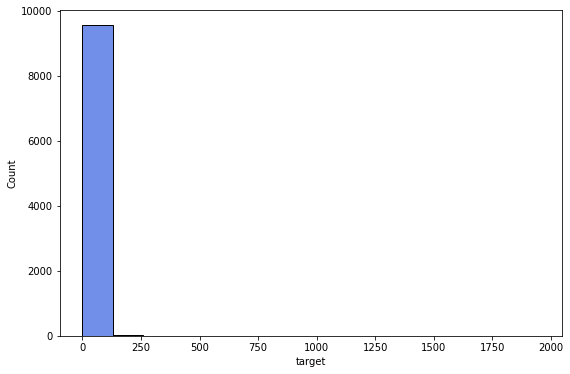

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['target'], color='royalblue', bins=15)
plt.show()

In [ ]:
df['log_target'] = np.log(df['overall_worklogs'])

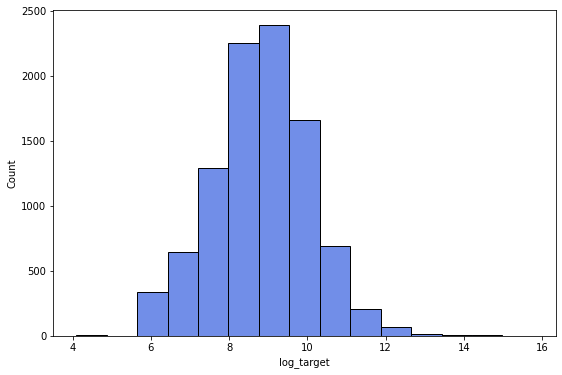

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['log_target'], color='royalblue', bins=15)
plt.show()

# Работа с дополнительными данными

## Комментарии к задачам

### Общий взгляд

In [ ]:
df_coms = pd.read_csv("./data/train/train_comments.csv")
df_coms.head()

,comment_id,text,issue_id,author_id
0,11779,[https://www.youtube.com/watch?v=tuhOdtsvoNY|h...,669666,1
1,10601,OK [~accountid:557058:3f7ab89a-8969-4547-90df-...,669670,1
2,76101,I encountered a problem with access to `/users...,670930,2
3,76102,I have learned that `users/:id/emails` endpoin...,670930,2
4,76213,We have decided with Andrew to set member's em...,670930,2


In [ ]:
df_coms.shape

(13918, 4)

In [ ]:
sum(df_coms.comment_id.duplicated())

0

In [ ]:
df_coms[df_coms.issue_id.duplicated()].head()

,comment_id,text,issue_id,author_id
3,76102,I have learned that `users/:id/emails` endpoin...,670930,2
4,76213,We have decided with Andrew to set member's em...,670930,2
6,75841,I learned how relations work in the cypher lan...,670934,2
7,75842,I'm working on add replies to existing messages.,670934,2
9,69736,Работы по задаче остановлены в связи с замороз...,675981,54


In [ ]:
df_coms_counts = df_coms.groupby('issue_id').agg({'comment_id': 'count',
                                                  'author_id': 'nunique'})
df_coms_counts.sort_values(by='comment_id', ascending=False).head()

,comment_id,author_id
issue_id,,
688628,135,3
727752,108,1
686683,107,1
686645,105,1
688826,101,1


In [ ]:
df_coms[df_coms.issue_id == 670934]['text'].values

array(['I have read the neo4j documentation and also I was able to get all users by using the MERGE clause.\xa0',
       'I learned how relations work in the cypher language.\xa0 And\xa0I added relationships for:\r\n\xa0User->Channel (or Group)\r\n\xa0User->Message\r\n\xa0Message->Channel',
       "I'm working on add replies to existing messages."], dtype=object)

In [ ]:
len(' '.join(df_coms[df_coms.comment_id == 688628]['text'].values))

0

In [ ]:
len(set(df_coms[df_coms.issue_id == 727752]['text'].values))

108

Можно заметить, что чем больше комментов у задачи, тем дольше она делается, некий data leakage

In [ ]:
df[df.id == 688628]['target']

8524    57.42
Name: target, dtype: float64

In [ ]:
df_coms_counts.sort_values(by='comment_id', ascending=False).tail()

,comment_id,author_id
issue_id,,
724415,1,1
724416,1,1
669670,1,1
724429,1,1
1056012,1,1


In [ ]:
df[df.id == 724415]['target']

5391    1.83
Name: target, dtype: float64

In [ ]:
df_coms_counts.sort_values(by='author_id', ascending=False).head()

,comment_id,author_id
issue_id,,
725121,19,6
722643,10,6
722855,29,6
727409,24,5
725257,10,5


In [ ]:
df[df.id == 725121]['target']

4819    33.25
Name: target, dtype: float64

In [ ]:
df_coms_counts.sort_values(by='author_id', ascending=False).tail()

,comment_id,author_id
issue_id,,
722676,2,1
722677,1,1
722678,3,1
722685,1,1
1056012,1,1


In [ ]:
df[df.id == 722676]['target']

6663    1.67
Name: target, dtype: float64

In [ ]:
df_coms_counts.reset_index(inplace=True)
df_coms_counts.rename(columns={"comment_id":"comments_cnt",
                               "author_id":"authors_cnt"},
                      inplace=True)
df_coms_counts.head()

,issue_id,comments_cnt,authors_cnt
0,669666,1,1
1,669670,1,1
2,670930,3,1
3,670934,3,1
4,675979,5,1


In [ ]:
len(set(df['id'].values) & set(df_coms['issue_id'].values)), len(df)

(3945, 9589)

### Тестовые комментарии

In [ ]:
df_test = pd.read_csv('./data/test/test_issues.csv')
df_coms_test = pd.read_csv('./data/test/test_comments.csv')

df_coms_test.groupby('issue_id').agg({'comment_id': 'count',
                                      'author_id': 'nunique'}).sort_values(by='comment_id',
                                                                           ascending=False).head(10)

,comment_id,author_id
issue_id,,
686526,145,2
686475,34,2
686460,26,2
721534,22,4
721286,12,2
1987124,11,2
856252,11,2
686500,11,1
679044,10,1


In [ ]:
df_coms_test[df_coms_test.issue_id == 686526]['text'].values

array(['[Maksim Gacheskiy|https://gitlab.com/HEKTOdaleky] mentioned this issue in [a commit|https://gitlab.com/sortedhouse/frontend/-/commit/f27748ad8db441a1ffc14e417adbce7e8cfaa83a] of [Sortedhouse / frontend|https://gitlab.com/sortedhouse/frontend]:{quote}SOR-687 - template changes{quote}',
       '[Maksim Gacheskiy|https://gitlab.com/HEKTOdaleky] mentioned this issue in [a commit|https://gitlab.com/sortedhouse/frontend/-/commit/55175016caac9dc966505fbe3461eabffe190919] of [Sortedhouse / frontend|https://gitlab.com/sortedhouse/frontend] on branch [SOR-687|https://gitlab.com/sortedhouse/frontend/-/tree/SOR-687]:{quote}SOR-687 - added incorrect service postcode functional{quote}',
       '[Maksim Gacheskiy|https://gitlab.com/HEKTOdaleky] mentioned this issue in [a merge request|https://gitlab.com/sortedhouse/frontend/-/merge_requests/347] of [Sortedhouse / frontend|https://gitlab.com/sortedhouse/frontend] on branch [SOR-687|https://gitlab.com/sortedhouse/frontend/-/tree/SOR-687]:{quote

In [ ]:
df_coms_test.groupby('issue_id').agg({'comment_id': 'count',
                                      'author_id': 'nunique'}).sort_values(by='comment_id',
                                                                           ascending=False).tail(10)

,comment_id,author_id
issue_id,,
721013,1,1
721011,1,1
721008,1,1
721004,1,1
721003,1,1
721001,1,1
720999,1,1
720995,1,1
720994,1,1


In [ ]:
len(set(df_test['id'].values) & set(df_coms_test['issue_id'].values)), len(df_test)

(479, 1070)

### Очистим и сохраним комментарии

Чтобы не плодить в исходном датасете к каждой задаче новые копии с разными комментариями, объединим комментарии одной задачи в один большой комментарий

In [ ]:
df_coms = df_coms.groupby('issue_id')['text'].sum().reset_index()
df_coms.head()

,issue_id,text
0,669666,[https://www.youtube.com/watch?v=tuhOdtsvoNY|h...
1,669670,OK [~accountid:557058:3f7ab89a-8969-4547-90df-...
2,670930,I encountered a problem with access to `/users...
3,670934,I have read the neo4j documentation and also I...
4,675979,Взял диск у Артура. Нашел в офисе комп собрал ...


In [ ]:
len(df_coms[df_coms['issue_id'] == 688628].text.values[0])

30899

In [ ]:
import re

def clear_text(text):
    t = re.sub(r'[^a-zA-Zа-яА-ЯёЁ\' ]', ' ', text)
    t = set(t.split())
    t = ' '.join(t)
    return t.lower()

df_coms['text'] = df_coms['text'].apply(clear_text)
df_coms.head()

,issue_id,text
0,669666,he works gay test maddevs watch help it tuhodt...
1,669670,ab for accountid e thanka update the message s...
2,670930,commits them to problem pushes encountered whe...
3,670934,added to or group working by also able learned...
4,675979,out calls это приготовил файлов за копирования...


In [ ]:
len(df_coms[df_coms['issue_id'] == 688628].text.values[0])

1929

In [ ]:
def lemmatize_text_rus(text):
    tokens = m.lemmatize(text)
    tokens = [token for token in tokens if token != '\n']
    text = " ".join(tokens)
    
    return text

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

def lemmatize_with_pos_eng(text):
    pos_tagged = nltk.pos_tag(w_tokenizer.tokenize(text))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, pos=tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence


df_coms['text'] = df_coms['text'].apply(lemmatize_text_rus)
df_coms['text'] = df_coms['text'].apply(lemmatize_with_pos_eng)

## Информация о работниках

In [ ]:
df_emp = pd.read_csv("./data/employees.csv")
df_emp.shape

(343, 13)

In [ ]:
df_emp.head()

,id,active,full_name,position,hiring_type,payment_type,salary_calculation_type,english_level,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,1,1,David Courtney,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,2,0,Dan Guerra,Web-разработчик,staff,fixed,NaN,NaN,0,0,0,0,0
2,4,0,Grady Smith,Web-разработчик,staff,fixed,NaN,NaN,0,0,0,0,0
3,6,0,James Powell,Разработчик мобильных приложений,staff,fixed,NaN,NaN,0,0,0,0,0
4,8,1,John Brown,Разработчик мобильных приложений,staff,fixed,NaN,NaN,1,1,1,1,1


In [ ]:
df_emp.describe()

,id,active,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,365.620991,0.492711,0.463557,0.466472,0.224490,0.253644,0.177843
std,236.675826,0.500677,0.499399,0.499603,0.417855,0.435732,0.382939
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,359.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,447.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,830.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          343 non-null    int64 
 1   active                      343 non-null    int64 
 2   full_name                   343 non-null    object
 3   position                    193 non-null    object
 4   hiring_type                 260 non-null    object
 5   payment_type                221 non-null    object
 6   salary_calculation_type     33 non-null     object
 7   english_level               16 non-null     object
 8   passport                    343 non-null    int64 
 9   is_nda_signed               343 non-null    int64 
 10  is_labor_contract_signed    343 non-null    int64 
 11  is_added_to_internal_chats  343 non-null    int64 
 12  is_added_one_to_one         343 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 35.0+ KB


Две фичи, расположенные ниже, исходя из малоинформативности будут отброшены

In [ ]:
df_emp['english_level'].unique()

array([nan, 'C1', 'B1', 'B2', 'A1', 'A2'], dtype=object)

In [ ]:
df_emp['salary_calculation_type'].unique()

array([nan, 'gross', 'net'], dtype=object)

In [ ]:
df_emp.drop(['english_level', 'salary_calculation_type'],
            axis=1, inplace=True)
df_emp.head()

,id,active,full_name,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,1,1,David Courtney,NaN,NaN,NaN,0,0,0,0,0
1,2,0,Dan Guerra,Web-разработчик,staff,fixed,0,0,0,0,0
2,4,0,Grady Smith,Web-разработчик,staff,fixed,0,0,0,0,0
3,6,0,James Powell,Разработчик мобильных приложений,staff,fixed,0,0,0,0,0
4,8,1,John Brown,Разработчик мобильных приложений,staff,fixed,1,1,1,1,1


Взглянем на другие фичи

### Тип оплачивания труда

In [ ]:
df_emp['payment_type'].value_counts()

fixed     160
hourly     61
Name: payment_type, dtype: int64

In [ ]:
df_emp['payment_type'].fillna('unknown', inplace=True)
df_emp['payment_type'].value_counts()

fixed      160
unknown    122
hourly      61
Name: payment_type, dtype: int64

### Позиция работника

In [ ]:
df_emp['position'].value_counts()

Web-разработчик                                 84
Менеджер проектов                               21
Разработчик мобильных приложений                13
Системный администратор (DevOps инженер)         6
DevOps инженер                                   5
разработчик мобильных приложений                 5
Копирайтер                                       5
Инженер-тестировщик                              4
Инженер тестировщик (QA engineer)                4
Web дизайнер                                     3
Сорсер                                           3
Delivery Manager                                 2
Ассистент HR-менеджера                           2
Системный администратор                          2
 Системный администратор                         1
графический дизайнер                             1
Ассистент менеджера проектов                     1
Рекрутер                                         1
ML-инженер                                       1
IT-рекрутер                    

Фича нуждается в чистке

In [ ]:
df_emp['position'] = df_emp['position'].apply(lambda x: x.lower().strip().replace('-', ' ') if x is not np.NaN else np.NaN)
df_emp['position'].value_counts()

web разработчик                                 85
менеджер проектов                               21
разработчик мобильных приложений                18
системный администратор (devops инженер)         6
копирайтер                                       5
devops инженер                                   5
инженер тестировщик                              4
инженер тестировщик (qa engineer)                4
web дизайнер                                     4
системный администратор                          3
сорсер                                           3
delivery manager                                 2
ассистент hr менеджера                           2
офис менеджер                                    2
менеджер по тендерам                             1
рекрутер                                         1
помощник бухгалтера                              1
графический дизайнер                             1
seo специалист                                   1
ассистент менеджера проектов   

In [ ]:
def clear_pos(x):
    if x is np.NaN:
        return x

    key_positions = ['web', 'директор', 'руководитель',
                     'devops', 'рекрутер', 'бухгалтер',
                     'hr', 'тестировщик']
    for key_pos in key_positions:
        if key_pos in x:
            return key_pos
    
    return x

df_emp['position'] = df_emp['position'].apply(clear_pos)
df_emp['position'].value_counts()

web                                           90
менеджер проектов                             21
разработчик мобильных приложений              18
devops                                        13
тестировщик                                    8
директор                                       6
копирайтер                                     5
руководитель                                   4
hr                                             3
сорсер                                         3
системный администратор                        3
delivery manager                               2
офис менеджер                                  2
бухгалтер                                      2
рекрутер                                       2
менеджер по тендерам                           1
ассистент менеджера проектов                   1
seo специалист                                 1
консультант                                    1
ml инженер                                     1
специалист по кдп   

In [ ]:
def associate_pos(x):
    if x is np.NaN:
        return x
    
    if x == 'рекрутер' or x == 'специалист отдела по управлению персоналом' or x == 'сорсер':
        return 'hr'
    elif x == 'графический дизайнер':
        return 'web'
    else:
        return x

df_emp['position'] = df_emp['position'].apply(associate_pos)
df_emp['position'].value_counts()

web                                 91
менеджер проектов                   21
разработчик мобильных приложений    18
devops                              13
hr                                   9
тестировщик                          8
директор                             6
копирайтер                           5
руководитель                         4
системный администратор              3
офис менеджер                        2
бухгалтер                            2
delivery manager                     2
ml инженер                           1
менеджер по тендерам                 1
seo специалист                       1
консультант                          1
специалист по кдп                    1
ассистент менеджера проектов         1
ведущий менеджер проектов            1
маркетолог                           1
dm политик                           1
Name: position, dtype: int64

In [ ]:
pos_pop = df_emp['position'].value_counts()

def remark_pos(x):
    if x is np.NaN or pos_pop[x] < 3:
        return 'other'
    else:
        return x

df_emp['position'] = df_emp['position'].apply(remark_pos)
df_emp['position'].value_counts()

other                               165
web                                  91
менеджер проектов                    21
разработчик мобильных приложений     18
devops                               13
hr                                    9
тестировщик                           8
директор                              6
копирайтер                            5
руководитель                          4
системный администратор               3
Name: position, dtype: int64

### hiring_type

In [ ]:
df_emp.head()

,id,active,full_name,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,1,1,David Courtney,other,NaN,unknown,0,0,0,0,0
1,2,0,Dan Guerra,web,staff,fixed,0,0,0,0,0
2,4,0,Grady Smith,web,staff,fixed,0,0,0,0,0
3,6,0,James Powell,разработчик мобильных приложений,staff,fixed,0,0,0,0,0
4,8,1,John Brown,разработчик мобильных приложений,staff,fixed,1,1,1,1,1


In [ ]:
df_emp['hiring_type'].value_counts()

staff        147
non_staff    113
Name: hiring_type, dtype: int64

In [ ]:
df_emp['hiring_type'].fillna('unknown', inplace=True)
df_emp['hiring_type'].value_counts()

staff        147
non_staff    113
unknown       83
Name: hiring_type, dtype: int64

### Другие фичи

In [ ]:
df_emp['active'].value_counts()

0    174
1    169
Name: active, dtype: int64

In [ ]:
df_emp['is_nda_signed'].value_counts()

0    183
1    160
Name: is_nda_signed, dtype: int64

In [ ]:
df_emp['is_labor_contract_signed'].value_counts()

0    266
1     77
Name: is_labor_contract_signed, dtype: int64

In [ ]:
df_emp['is_added_to_internal_chats'].value_counts()

0    256
1     87
Name: is_added_to_internal_chats, dtype: int64

In [ ]:
df_emp['is_added_one_to_one'].value_counts()

0    282
1     61
Name: is_added_one_to_one, dtype: int64

Не нуждаются в предобработке

### Итоговый взгляд

Уберем фичу имени, она бесполезна

In [ ]:
df_emp.drop('full_name', axis=1, inplace=True)

In [ ]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          343 non-null    int64 
 1   active                      343 non-null    int64 
 2   position                    343 non-null    object
 3   hiring_type                 343 non-null    object
 4   payment_type                343 non-null    object
 5   passport                    343 non-null    int64 
 6   is_nda_signed               343 non-null    int64 
 7   is_labor_contract_signed    343 non-null    int64 
 8   is_added_to_internal_chats  343 non-null    int64 
 9   is_added_one_to_one         343 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 26.9+ KB


In [ ]:
df_emp.head()

,id,active,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,1,1,other,unknown,unknown,0,0,0,0,0
1,2,0,web,staff,fixed,0,0,0,0,0
2,4,0,web,staff,fixed,0,0,0,0,0
3,6,0,разработчик мобильных приложений,staff,fixed,0,0,0,0,0
4,8,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1


## Работа с основным датасетом и присоединение к нему доп данных

In [ ]:
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary,summary_symbols,summary_tokens,lemm_summary,target,log_target
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,ui тесты по заказу добро кейджи,33,6,ui тест по заказ добро кейджи,0.50,7.495542
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,ui тесты раздела профиль,26,4,ui тест раздел профиль,2.00,8.881836
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,ui тесты раздела личный счет,30,5,ui тест раздел личный счет,4.00,9.574983
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,ui тесты раздела новости,26,4,ui тест раздел новость,0.25,6.802395
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,ui тесты раздела зоны скидок и доплат,39,7,ui тест раздел зона скидка и доплата,0.25,6.802395


In [ ]:
df.drop(['summary', 'overall_worklogs', 'target', 'clear_summary',
         'summary_symbols', 'summary_tokens', 'creator_id'], axis=1, inplace=True)
df.head()

,id,project_id,assignee_id,year,month,day,hour,minute,key_name,lemm_summary,log_target
0,819952,5,93,2019,10,1,5,57,SM,ui тест по заказ добро кейджи,7.495542
1,819949,5,93,2019,10,1,5,59,SM,ui тест раздел профиль,8.881836
2,819947,5,93,2019,10,1,6,0,SM,ui тест раздел личный счет,9.574983
3,819943,5,93,2019,10,1,6,2,SM,ui тест раздел новость,6.802395
4,819941,5,93,2019,10,1,6,3,SM,ui тест раздел зона скидка и доплата,6.802395


### Присоединяем работников

Так как нам важно время выполнения задачи, которое зависит от человека который ее выполняет, то создателя задачи можем отбросить

In [ ]:
df = pd.merge(df, df_emp, left_on="assignee_id", right_on="id", how='left',
              suffixes=('', '_y'))
df.head()

,id,project_id,assignee_id,year,month,day,hour,minute,key_name,lemm_summary,...,id_y,active,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,819952,5,93,2019,10,1,5,57,SM,ui тест по заказ добро кейджи,...,93,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
1,819949,5,93,2019,10,1,5,59,SM,ui тест раздел профиль,...,93,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
2,819947,5,93,2019,10,1,6,0,SM,ui тест раздел личный счет,...,93,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
3,819943,5,93,2019,10,1,6,2,SM,ui тест раздел новость,...,93,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
4,819941,5,93,2019,10,1,6,3,SM,ui тест раздел зона скидка и доплата,...,93,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9589 entries, 0 to 9588
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9589 non-null   int64  
 1   project_id                  9589 non-null   int64  
 2   assignee_id                 9589 non-null   int64  
 3   year                        9589 non-null   int64  
 4   month                       9589 non-null   int64  
 5   day                         9589 non-null   int64  
 6   hour                        9589 non-null   int64  
 7   minute                      9589 non-null   int64  
 8   key_name                    9589 non-null   object 
 9   lemm_summary                9589 non-null   object 
 10  log_target                  9589 non-null   float64
 11  id_y                        9589 non-null   int64  
 12  active                      9589 non-null   int64  
 13  position                    9589 

In [ ]:
df.drop(['assignee_id', 'id_y'], axis=1, inplace=True)

### Присоединяем информацию о комментариях

In [ ]:
df.head()

,id,project_id,year,month,day,hour,minute,key_name,lemm_summary,log_target,active,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,819952,5,2019,10,1,5,57,SM,ui тест по заказ добро кейджи,7.495542,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
1,819949,5,2019,10,1,5,59,SM,ui тест раздел профиль,8.881836,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
2,819947,5,2019,10,1,6,0,SM,ui тест раздел личный счет,9.574983,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
3,819943,5,2019,10,1,6,2,SM,ui тест раздел новость,6.802395,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1
4,819941,5,2019,10,1,6,3,SM,ui тест раздел зона скидка и доплата,6.802395,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1


In [ ]:
df_coms_counts.head()

,issue_id,comments_cnt,authors_cnt
0,669666,1,1
1,669670,1,1
2,670930,3,1
3,670934,3,1
4,675979,5,1


In [ ]:
df = pd.merge(df, df_coms_counts, left_on="id", right_on="issue_id", how='left')
df.head()

,id,project_id,year,month,day,hour,minute,key_name,lemm_summary,log_target,...,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one,issue_id,comments_cnt,authors_cnt
0,819952,5,2019,10,1,5,57,SM,ui тест по заказ добро кейджи,7.495542,...,staff,fixed,1,1,1,1,1,NaN,NaN,NaN
1,819949,5,2019,10,1,5,59,SM,ui тест раздел профиль,8.881836,...,staff,fixed,1,1,1,1,1,819949.0,1.0,1.0
2,819947,5,2019,10,1,6,0,SM,ui тест раздел личный счет,9.574983,...,staff,fixed,1,1,1,1,1,NaN,NaN,NaN
3,819943,5,2019,10,1,6,2,SM,ui тест раздел новость,6.802395,...,staff,fixed,1,1,1,1,1,NaN,NaN,NaN
4,819941,5,2019,10,1,6,3,SM,ui тест раздел зона скидка и доплата,6.802395,...,staff,fixed,1,1,1,1,1,819941.0,1.0,1.0


In [ ]:
df.drop(['id', 'issue_id'], axis=1, inplace=True)
df.head()

,project_id,year,month,day,hour,minute,key_name,lemm_summary,log_target,active,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one,comments_cnt,authors_cnt
0,5,2019,10,1,5,57,SM,ui тест по заказ добро кейджи,7.495542,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,NaN,NaN
1,5,2019,10,1,5,59,SM,ui тест раздел профиль,8.881836,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,1.0,1.0
2,5,2019,10,1,6,0,SM,ui тест раздел личный счет,9.574983,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,NaN,NaN
3,5,2019,10,1,6,2,SM,ui тест раздел новость,6.802395,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,NaN,NaN
4,5,2019,10,1,6,3,SM,ui тест раздел зона скидка и доплата,6.802395,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,1.0,1.0


In [ ]:
df['comments_cnt'] = df['comments_cnt'].fillna(0).astype('int32')
df['authors_cnt'] = df['authors_cnt'].fillna(0).astype('int32')
df.head()

,project_id,year,month,day,hour,minute,key_name,lemm_summary,log_target,active,position,hiring_type,payment_type,passport,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one,comments_cnt,authors_cnt
0,5,2019,10,1,5,57,SM,ui тест по заказ добро кейджи,7.495542,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,0,0
1,5,2019,10,1,5,59,SM,ui тест раздел профиль,8.881836,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,1,1
2,5,2019,10,1,6,0,SM,ui тест раздел личный счет,9.574983,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,0,0
3,5,2019,10,1,6,2,SM,ui тест раздел новость,6.802395,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,0,0
4,5,2019,10,1,6,3,SM,ui тест раздел зона скидка и доплата,6.802395,1,разработчик мобильных приложений,staff,fixed,1,1,1,1,1,1,1


In [ ]:
df[df['authors_cnt'] != 0][['comments_cnt', 'authors_cnt']].describe()

,comments_cnt,authors_cnt
count,3945.000000,3945.000000
mean,3.528010,1.277060
std,6.961338,0.567943
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,1.000000
max,135.000000,6.000000


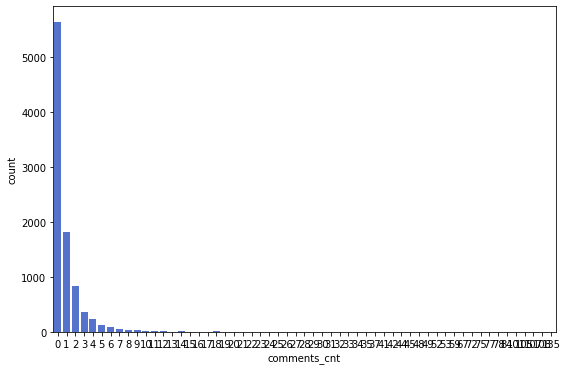

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(x=df['comments_cnt'],
              color='royalblue')
plt.show()

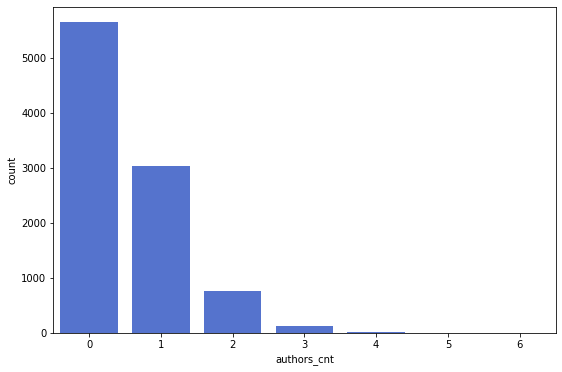

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(x=df['authors_cnt'],
              color='royalblue')
plt.show()